<a href="https://colab.research.google.com/github/sharan-88/ALL_RAG_IN_ONE/blob/main/RAG_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quie --upgrade langchain-text-splitters langchain-community langgraph


In [2]:
import getpass
import os


if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"]=getpass.getpass("Enter the api key for gemini")

Enter the api key for gemini··········


In [3]:
!pip install -U langchain-google-genai

In [4]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")

In [5]:

from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

### web scraping

In [10]:
loader =  WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only =bs4.SoupStrainer(
            class_ =("post-content","post-title","post-header")
        )
    ),
)
docs = loader.load()

#### splitting data in docs into chunks to send the relevent information or part of doc insted of sending entire document into llm

In [11]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)
print(all_splits)

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refi

In [12]:
print(all_splits[0])
print("__________________________________________________________")
print(all_splits[1])

page_content='LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:

Planning

Subgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.
Reflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.


Memory' metadata={'sour

 vector store crating and  storing  chunks data into vector store
 converting text into numbers especially vectors

In [13]:
# !pip install -qU langchain-core

!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.0 MB/s e

In [8]:
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
import bs4

In [16]:
vector_store._collection.count()  #printing vector and documents
print(vector_store._collection.get(ids=['3312ec70-7fcf-4061-8542-3e360e25fcde',],include=["embeddings","documents"]))

{'ids': [], 'embeddings': array([], dtype=float64), 'documents': [], 'uris': None, 'included': ['embeddings', 'documents'], 'data': None, 'metadatas': None}


In [15]:
retriever = vector_store.as_retriever()

### inbuilt prompt

In [17]:
#  ATRGUMENTATION
from langchain import hub

# N.B. for non-US LangSmith endpoints, you may need to specify
# api_url="https://api.smith.langchain.com" in hub.pull.
prompt = hub.pull("rlm/rag-prompt")

# --------how to sent this prompt user question and context
example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [14]:
# from langchain_core.vectorstores import InMemoryVectorStore

# vector_store = InMemoryVectorStore(embeddings)
# print(vector_store)

from langchain_chroma import Chroma
vector_store =Chroma.from_documents(

    documents =all_splits,
    embedding = embeddings
)
print(vector_store)
print(vector_store._collection.get())


{'ids': ['0eb9a2fa-a04a-41e7-a12d-49c5cd2160b0', '024dd7f0-78d3-4449-bd73-3c8acc67473a', 'd2950724-8200-457c-a964-5a1952d39327', '9fca6594-bb89-4f9f-b38c-e3deeab414e4', 'a0ec4eb8-8b93-4f0f-9b1c-0ae80473897e', 'dee13018-b1f5-4d6a-88da-55d540168785', 'a1763321-6b60-4b8f-bf25-3ff2af7064b3', '2c34bf4b-a59e-4cdd-85e7-258fdac7296e', '3ab9e24e-f80e-4481-a6a3-e146b36abbcf', '1f073e1d-306c-4b92-8e91-c3aa564ee1cc', '5b4008a4-c1f7-4769-926c-812585e10993', 'f301233d-9d0d-44b5-9363-577029808756', '2c24149a-8561-4845-8b7a-e2e97b40af46', 'fe6a32f8-08f2-4dd1-b799-f4b7261a2763', '8f9e88d7-fe03-4a8a-a039-64ca32938536', 'b07c20e0-2869-4e29-82ab-c9dc85ace549', 'ed3f8384-f3d0-42bb-be75-6c4c18cb4293', '8cb1aaa1-fe64-4a1b-ab98-7857790ade23', '4ed8748b-d0dc-48ef-885e-03990c2613ad', '6108ce23-83e1-45c5-9adf-6fd1d17af272', '7824c5ad-013c-4d87-a2d1-e61e90091ef6', 'd7d80ad3-9c4e-45c7-b79e-95863c0d104b', '02708afb-29ed-49c7-a920-1e4f3bb60e0d', '14f9790d-08f0-4637-85c0-cd36b68c96ad', 'd4bbc667-a564-40a5-b07c-5f010a

In [9]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [18]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [19]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

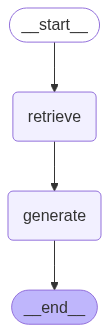

In [20]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
result = graph.invoke({"question": "What is API bank?"})

print(f"Context: {result['context']}\n\n")
print(f"Answer: {result['answer']}")

Context: [Document(id='c09bbae2-3ac6-47f4-8095-8e7f8c875064', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='API-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It contains 53 commonly used API tools, a complete tool-augmented LLM workflow, and 264 annotated dialogues that involve 568 API calls. The selection of APIs is quite diverse, including search engines, calculator, calendar queries, smart home control, schedule management, health data management, account authentication workflow and more. Because there are a large number of APIs, LLM first has access to API search engine to find the right API to call and then uses the corresponding documentation to make a call.'), Document(id='35b47de2-7375-4df4-b7a8-0a0a7aebc86a', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Pseudo code of how LLM makes an API call in API-Bank. (Image source: Li et al. 2023)\n\nIn